# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Santiago Gutierrez Gonzalez

- ID: A00572499

- My carreer: Ingenieria en Tecnologia Computacional



# Importing libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np




# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [19]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    !ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "drive/MyDrive/Portafolio de Evidencias/SemanaTecAnalisisComputacional/TC1002S/Evidencia/A00572499_X.csv"

else:
    # Define path del proyecto
    Ruta            = ""

df = pd.read_csv(Ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/': No such file or directory


## b) Data managment


Print the first 7 rows

In [21]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,2.241363,7.660557,5.368002,-5.915446,2.396848,7.967401,-7.413656,1.888483,-10.371965,-5.084792,4.148609
1,1,2.902781,3.440485,9.971374,-0.490330,4.298637,4.791306,-6.815669,7.162042,-6.575517,4.842733,0.087651
2,2,-10.112356,-9.553338,6.157767,-1.071462,8.117554,0.984138,9.430975,0.957551,-4.662201,1.192500,4.479465
3,3,9.898005,-9.158219,-5.413064,-9.733759,-2.563988,-7.520806,-2.956125,3.252666,4.591756,4.509519,-0.480360
4,4,-10.482629,-8.627337,6.226632,1.117284,5.684152,5.723505,9.273737,1.152140,-2.389036,-0.014798,5.033391
5,5,-9.239789,-3.534708,8.112061,0.786341,9.421030,-1.792368,2.792387,-0.570349,-3.645326,2.523549,2.367713
6,6,-10.365550,-7.443493,8.187808,-0.032854,5.796888,0.285235,9.725089,-1.915353,-1.176502,-0.221596,4.378513


Print the last 4 rows

In [22]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
908,908,2.517648,2.896144,8.938705,2.040632,-0.019685,8.407666,-4.219037,7.875965,-7.195673,1.351615,3.252674
909,909,11.683682,-3.808043,-5.091650,-11.448857,-3.273984,-7.473456,-7.051208,8.447473,4.860893,6.428600,-2.843596
910,910,3.098041,9.988953,-3.833391,-7.432654,0.239927,12.227221,-0.767607,-6.807481,-9.022677,3.909168,-0.361279
911,911,-1.923528,6.814659,2.083199,-6.762434,9.321053,10.284240,-10.684122,5.111128,-6.480633,-3.618337,1.218797


How many rows and columns are in your data?

Use the `shape` method


In [23]:
df.shape

(912, 12)

Print the name of all columns

Use the `columns` method

In [24]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [25]:
df.dtypes

,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


What is the meaning of rows and columns?

Your responses here

Columns

1.Unnamed: 0 likely serves as an index or identifier.

2.Columns x1 to x11 represent floating-point measurements that could signify various quantitative metrics.

Rows

3. Each row can be viewed as a unique data point with varying values in these 11 columns, which may represent different metrics or observations in a scientific or statistical context. The values change between positive and negative, they might measure diverse parameters.


...

Print a statistical summary of your columns


In [28]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,455.500000,0.395195,0.899458,2.813640,-4.932413,3.132271,4.614371,-2.206068,1.834371,-4.353718,2.732646,1.045259
std,263.416021,6.258821,7.513843,5.868261,5.394726,4.663158,6.250748,6.003875,5.671842,5.202826,3.689548,3.493554
min,0.000000,-16.612124,-14.330443,-9.870351,-15.957025,-9.156850,-10.493581,-12.802091,-12.513767,-15.166367,-8.344017,-9.037184
25%,227.750000,-3.258347,-6.947882,-3.009143,-9.411857,0.099947,0.179907,-6.618217,-0.721441,-8.082749,-0.078074,-1.847643
50%,455.500000,0.031546,3.235942,4.409087,-7.064237,3.402664,7.123243,-3.889710,2.726605,-5.668103,3.268279,1.487821
75%,683.250000,4.941612,7.792936,7.869146,0.628037,6.796242,9.434838,0.170976,5.791213,-1.665360,5.530276,3.881007
max,911.000000,15.630301,14.177651,13.894021,6.898825,13.730814,15.561149,15.469753,13.599960,9.357851,11.075900,9.492904


1. What is the minumum and maximum values of each variable:
min	0.000000	-16.612124	-14.330443	-9.870351	-15.957025	-9.156850	-10.493581	-12.802091	-12.513767	-15.166367	-8.3
max	911.000000	15.630301	14.177651	13.894021	6.898825	13.730814	15.561149	15.469753	13.599960	9.357851	11.075900	9.492904


2. What is the mean and standar deviation of each variable:
mean	455.500000	0.395195	0.899458	2.813640	-4.932413	3.132271	4.614371	-2.206068	1.834371	-4.353718	2.732646	1.045259
std	263.416021	6.258821	7.513843	5.868261	5.394726	4.663158	6.250748	6.003875	5.671842	5.202826	3.689548	3.493554

3. What the 25%, 50% and 75% represent?:

Those three percentages represent the quartiles present in the dataset, they can be useful to check on the distribution of the data, and central tendencies within that dataset.

Rename the columns using the same name with capital letters

In [29]:
df = df.rename(columns={
    'Unnamed: 0': 'UNNAMED: 0',
    'x1': 'X1',
    'x2': 'X2',
    'x3': 'X3',
    'x4': 'X4',
    'x5': 'X5',
    'x6': 'X6',
    'x7': 'X7',
    'x8': 'X8',
    'x9': 'X9',
    'x10': 'X10'
})


Rename the columns to their original names

In [31]:
df = df.rename(columns={
    'UNNAMED: 0': 'Unnamed: 0',
    'X1': 'x1',
    'X2': 'x2',
    'X3': 'x3',
    'X4': 'x4',
    'X5': 'x5',
    'X6': 'x6',
    'X7': 'x7',
    'X8': 'x8',
    'X9': 'x9',
    'X10': 'x10'
})


Use two different alternatives to get one of the columns

In [32]:
df['x1']
df.x1

,x1
0,2.241363
1,2.902781
2,-10.112356
3,9.898005
4,-10.482629
...,...
907,6.121560
908,2.517648
909,11.683682
910,3.098041


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [42]:
slicedDf=df.iloc[62:72, 1:3]

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [39]:
nRows= slicedDf.isnull().sum() + slicedDf.notnull().sum()
print(nRows)

x1    10
x2    10
dtype: int64


Discard the last column


In [43]:
slicedDf = slicedDf.drop(columns='x2')

### Questions

Based on the previos results, provide a full description of yout dataset

Your response: This dataset consists of 912 rows of float values which have a variety of distributions, min and max values. Besides there is 12 columns, 11 of them are floats and can be useful to use for statistical analysis because of the diverse distribution of the data, there is also a column with integer values that seems to be indexing the values that are present.

The unnamed column does not provide any statistical information
Range and Distribution:

Each column has a large range of values, as indicated by the minimum and maximum values in the summary statistics:
Minimum values range from approximately -16 to -15.
Maximum values reach around 15.
This distribution suggests a mix of both positive and negative values, these are measurements with fluctuations that can be things like temperature, stock values, scientific observations or something more.

This dataset can be useful for Machine Learning: It may serve as a feature matrix for training models, particularly if x1 to x11 are features in a classification or regression problem.




## c) Data visualization

Plot in the histogram of one of the variables

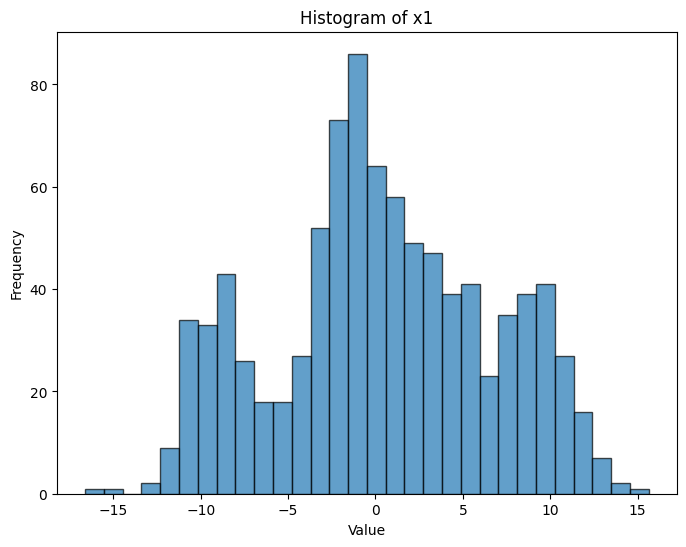

In [44]:

plt.figure(figsize=(8, 6))
plt.hist(df['x1'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of x1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Plot in the same figure the histogram of two variables



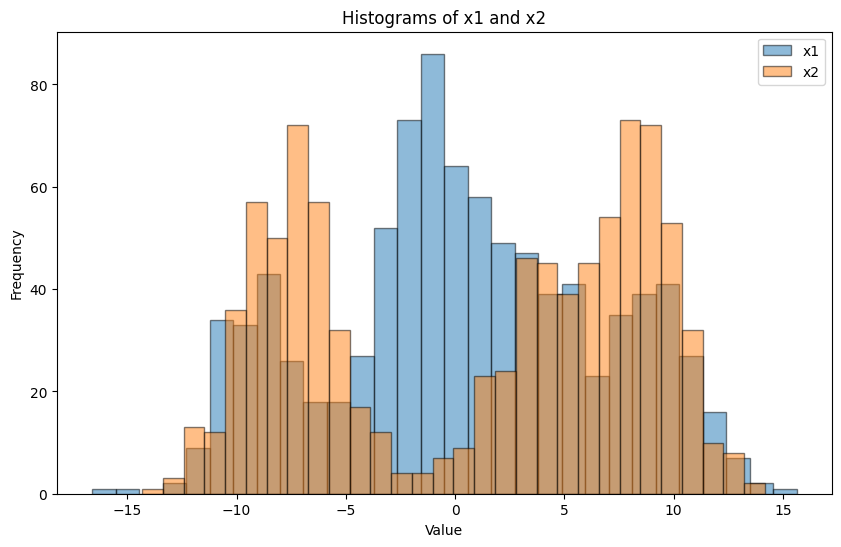

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['x1'], bins=30, edgecolor='black', alpha=0.5, label='x1')
plt.hist(df['x2'], bins=30, edgecolor='black', alpha=0.5, label='x2')
plt.title('Histograms of x1 and x2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here: What we can see in the plot is that there is even kind of a complementary relation between x1 and x2, when the frecuency of x1 is larger the one x2 is bigger and viceversa. Besides in x1 we see more of a central tendency, and has more of a normal distribution.

Plot the boxplot of one of the variables

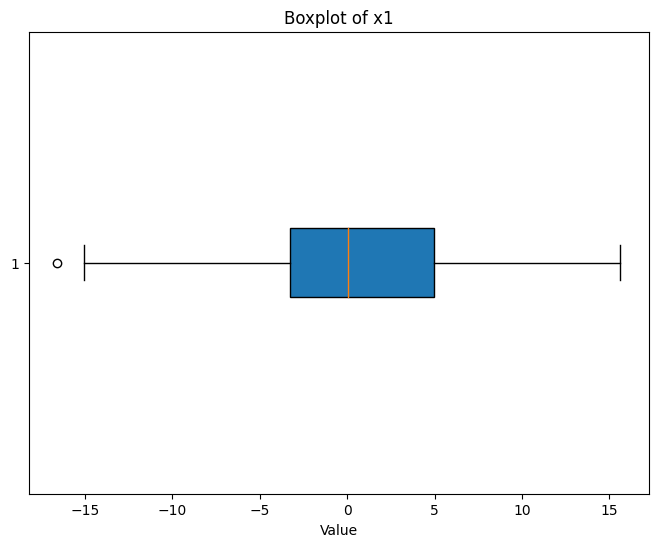

In [46]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['x1'], vert=False, patch_artist=True)
plt.title('Boxplot of x1')
plt.xlabel('Value')
plt.show()

Plot in the same figure the boxplot of two variables

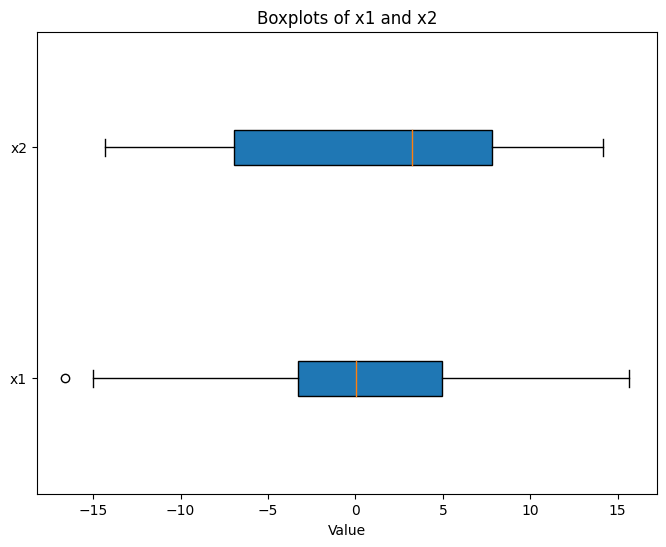

In [47]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['x1'], df['x2']], vert=False, patch_artist=True, labels=['x1', 'x2'])
plt.title('Boxplots of x1 and x2')
plt.xlabel('Value')
plt.show()

Based on these plots, provide a description of your data:

Your response here:
As we can see in these boxplots the distribution and fluctuation of values or the "range" is much smaller for the feature x1, while for the feature x2 the range of values is larger, beside having a larger range of negative values. For the x1 the range of positive values is larger.

Plot the scatter plot between all pair of variables

<Figure size 1200x1200 with 0 Axes>

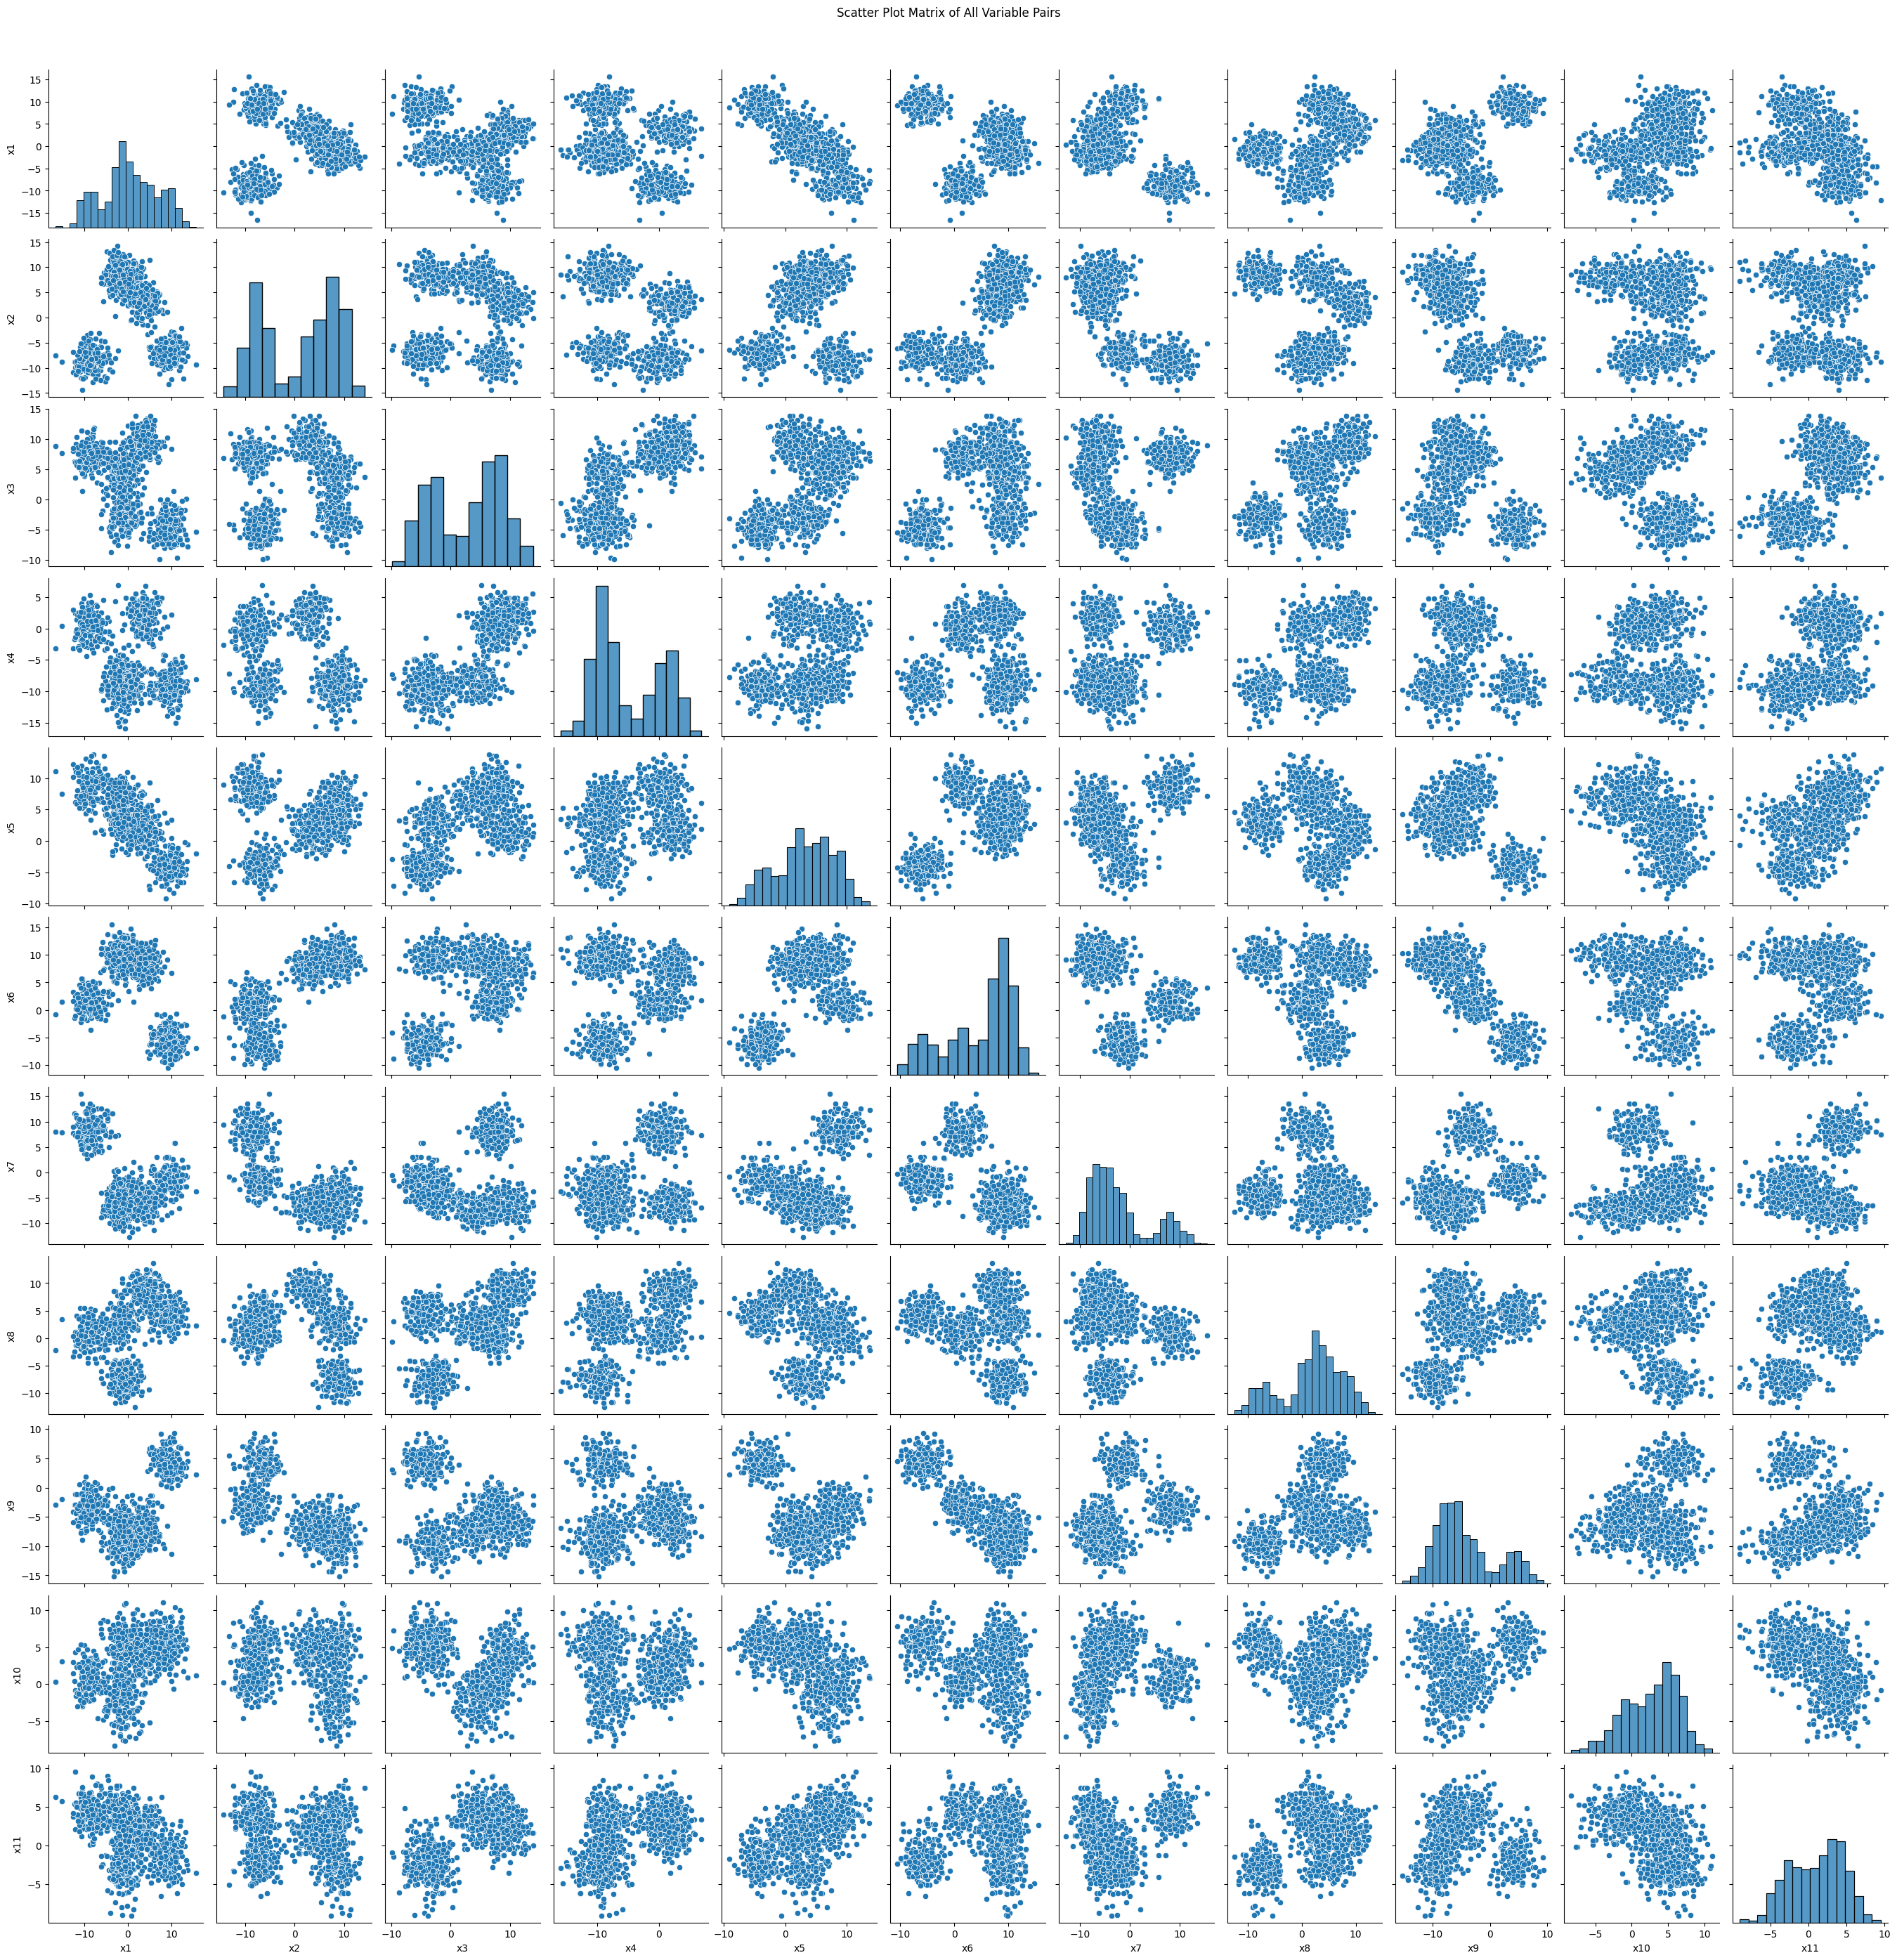

In [50]:

plt.figure(figsize=(12, 12))
sns.pairplot(df.iloc[:, 1:])
plt.suptitle("Scatter Plot Matrix of All Variable Pairs", y=1.02)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:
The matrix allows to visualize correlations and distributions across each variable pair in the dataset, helping to identify trends, clusters, and potential linear or nonlinear relationships.

What we can see also is that some variables do display linearity allowing of a possibility of linear regression. Simultaneously there is normal distribution for some of the variables and they behave in a complementary way for some others.




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [51]:
initial_k = 4

Add to your dataset a column with the estimated cluster to each data point

In [54]:
kmeans = KMeans(n_clusters=initial_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.iloc[:, 1:])  # Exclude col 0

Print the number associated to each cluster

In [60]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)


Cluster
1    364
3    183
2    183
0    182
Name: count, dtype: int64


Print the centroids

In [59]:
centroids = kmeans.cluster_centers_
print(centroids)


[[ 9.24154659 -6.87892615 -4.39429654 -8.9771572  -3.860629   -5.73415985
  -1.4574263   4.27366416  4.40172118  5.57656459 -1.65224433]
 [-1.1097632   8.34703171  0.78746661 -9.01779744  4.63346098  9.58545009
  -5.81648127 -2.3138035  -8.18548242  1.41724924  0.34718135]
 [-8.64356172 -8.4090284   7.29429819  0.35858879  8.52185801  1.61471382
   8.27931401  0.84437268 -3.27191871  0.82427904  4.35035183]
 [ 3.62940869  3.13007261  9.531733    1.92534851  1.71139627  8.01817914
  -6.25462992  8.64942116 -6.5214632   4.42905301  1.81145371]]


Print the intertia metric

In [58]:
inertia = kmeans.inertia_
print(inertia)


66244.64563739715


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

Text(0, 0.5, 'x2')

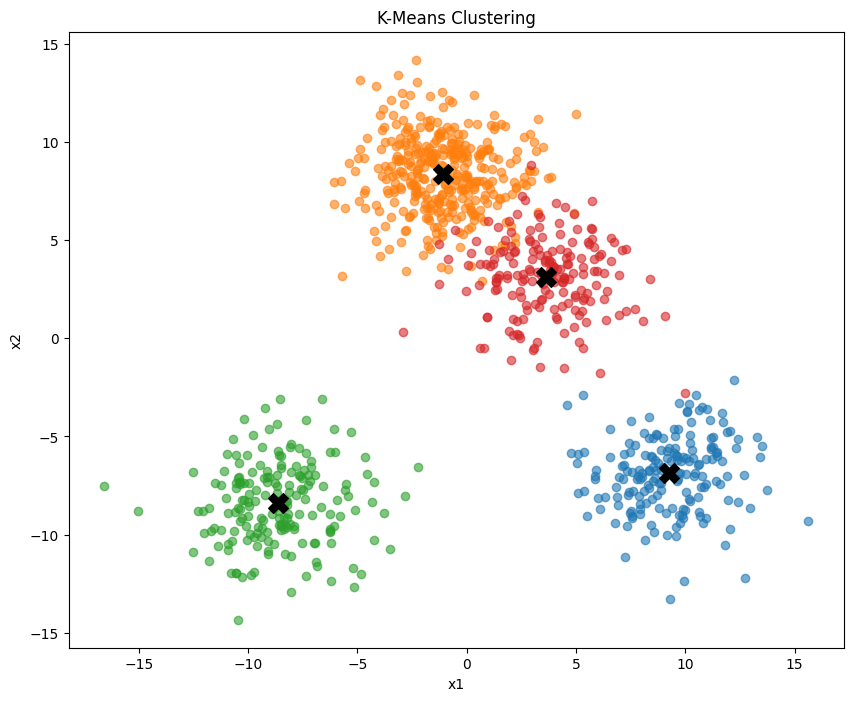

In [62]:
plt.figure(figsize=(10, 8))

for cluster_num in range(initial_k):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['x1'], cluster_data['x2'], label=f'Cluster {cluster_num}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('x1')
plt.ylabel('x2')

### Questions

Provides a detailed description of your results

Your response:
We can see in the cluster image that this initial guess of k as 4 already provides with a good set of results without sacrificing too much computing power. We are able to see that the distance to the centroids for each point is no that big, and that this is a good starting point for clustering.

## d) Elbow plot

Compute the Elbow plot

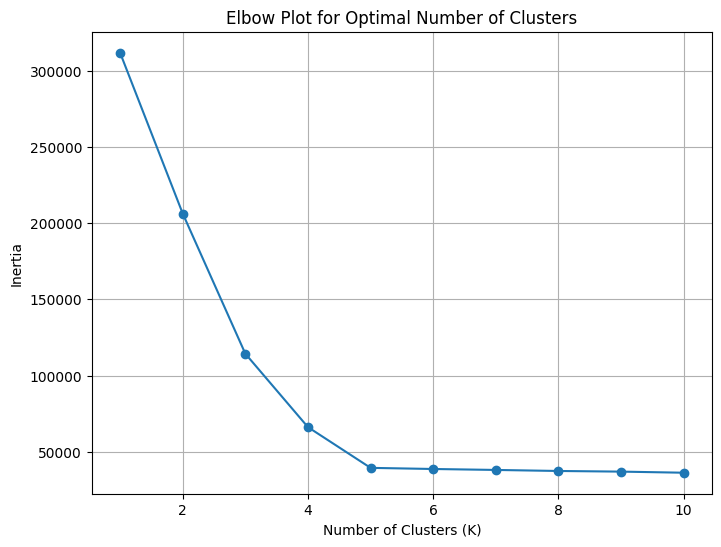

In [65]:
cluster_range = range(1, 11)
inertia_values = []



for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(df.iloc[:, 1:])  # Exclude 'Unnamed: 0'
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
Based of the elbow plot we can clearly see that k=5 is the best number of clusters since it is here that the errors get minimized

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
It does not agree with my initial guess but it does however gets very close to the initial guess with the distance error not being significant between this two points.



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [66]:
# Import the dataset
from sklearn.datasets import load_digits

# Load the dataset
DS = load_digits()

2) Plot some of the observations (add in the title the label/digit of that obserbation)

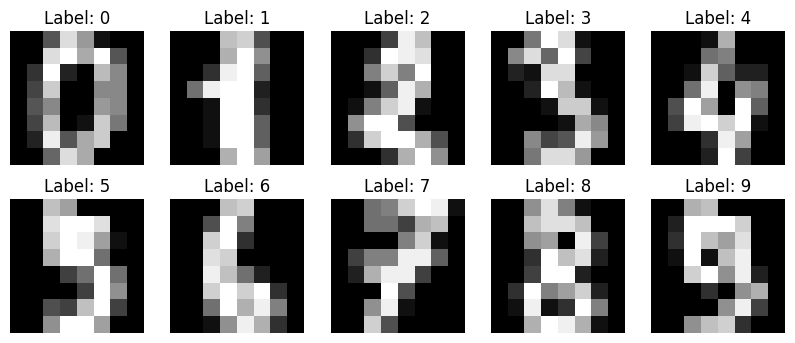

In [67]:
plt.figure(figsize=(10, 4))

for index in range(10):
    plt.subplot(2, 5, index + 1)
    plt.imshow(DS.images[index], cmap='gray')
    plt.title(f"Label: {DS.target[index]}")
    plt.axis('off')

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [68]:
n_clusters = 10  # Number based on the 10 possible digits (0-9)

# KMeans clustering using all 64 features (pixels)
kmeans_all = KMeans(n_clusters=n_clusters, random_state=42)
DS['KmeansAll'] = kmeans_all.fit_predict(DS.data)

# first row (8 features)
kmeans_1row = KMeans(n_clusters=n_clusters, random_state=42)
DS['Kmeans1row'] = kmeans_1row.fit_predict(DS.data[:, :8])

# fourth row (8 features)
kmeans_4row = KMeans(n_clusters=n_clusters, random_state=42)
DS['Kmeans4row'] = kmeans_4row.fit_predict(DS.data[:, 24:32])

# eighth row (8 features)
kmeans_8row = KMeans(n_clusters=n_clusters, random_state=42)
DS['Kmeans8row'] = kmeans_8row.fit_predict(DS.data[:, 56:64])

kmeans_results = {
    'KmeansAll': DS['KmeansAll'],
    'Kmeans1row': DS['Kmeans1row'],
    'Kmeans4row': DS['Kmeans4row'],
    'Kmeans8row': DS['Kmeans8row']
}

kmeans_results

{'KmeansAll': array([5, 7, 7, ..., 8, 9, 8], dtype=int32),
 'Kmeans1row': array([2, 9, 3, ..., 9, 2, 4], dtype=int32),
 'Kmeans4row': array([8, 1, 7, ..., 6, 5, 6], dtype=int32),
 'Kmeans8row': array([3, 5, 6, ..., 3, 5, 5], dtype=int32)}

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

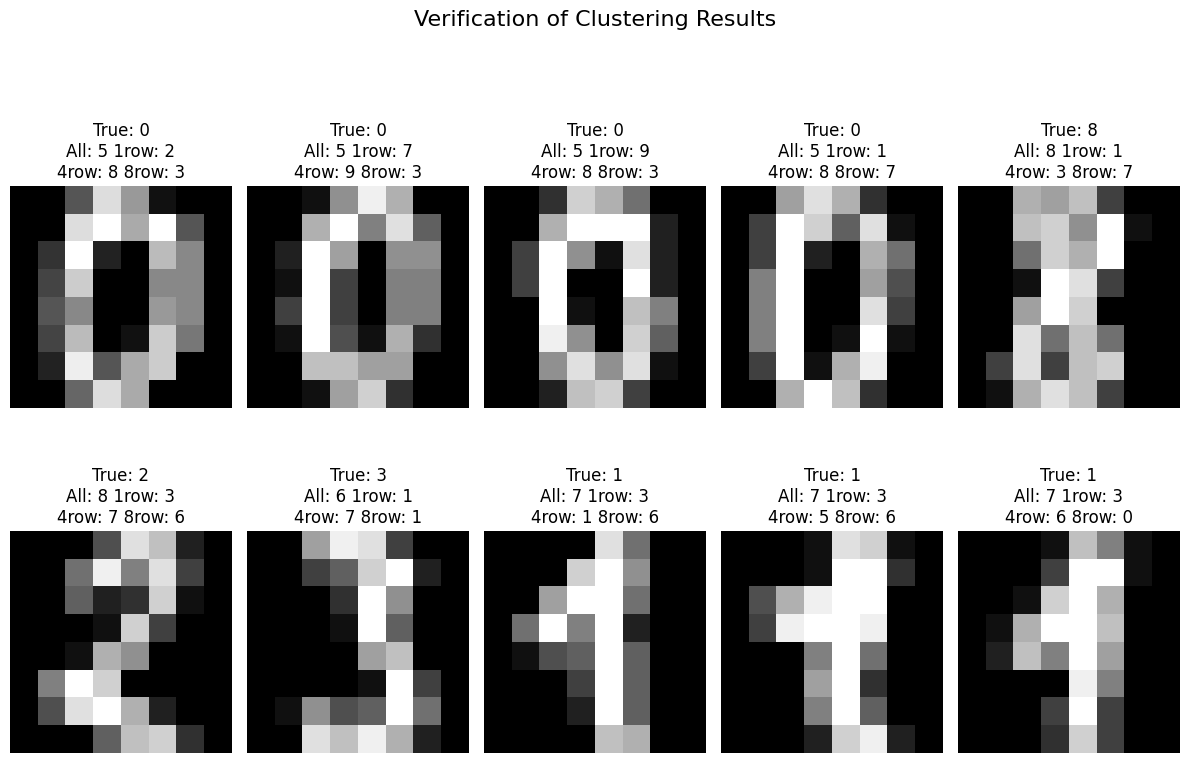

In [71]:
sample_indices = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.figure(figsize=(12, 8))
for idx, sample_idx in enumerate(sample_indices):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(DS.images[sample_idx], cmap='gray')
    plt.title(f"True: {DS.target[sample_idx]}\nAll: {DS['KmeansAll'][sample_idx]} "
              f"1row: {DS['Kmeans1row'][sample_idx]}\n4row: {DS['Kmeans4row'][sample_idx]} "
              f"8row: {DS['Kmeans8row'][sample_idx]}")
    plt.axis('off')

plt.suptitle("Verification of Clustering Results", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

5) Compute the Elbow plot

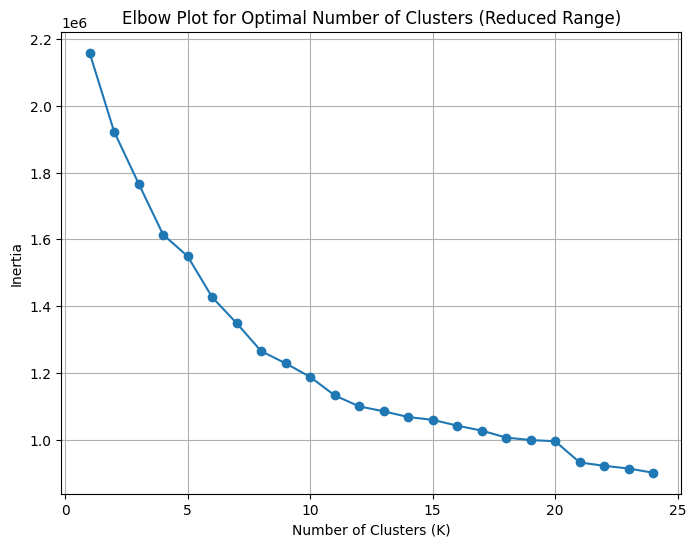

In [75]:
cluster_range = range(1, 25)
inertia_values = []

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(DS.data)
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):
As we can see the results are quite varied. Although one would think that using KmeansAll would provide the best result always, it was not actually te case, but rather it provided better results using Kmeans1 row by actually giving the right response in one more ocation than KmeansAll.

Besides this, clearly the number of cluster that is ideal is for obvious reasons 10 since there are 9 possible digits, we can actually prove this by seeing the elbow plot and how the error got minimized. Although the error keeps decreasing, the difference is minimal and it is not worth it for the computational cost.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [79]:
# Import the dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


# Load the dataset
DS = load_digits()

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

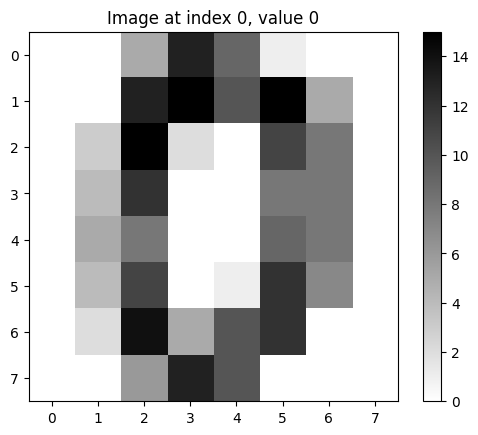

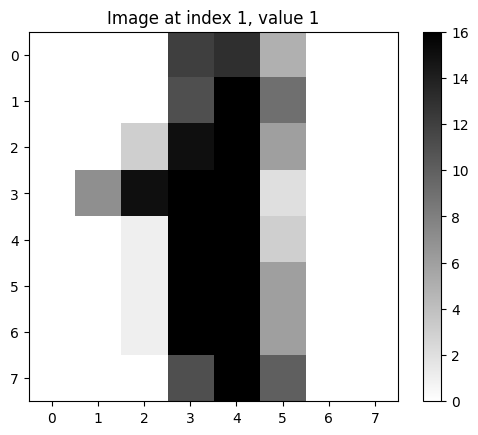

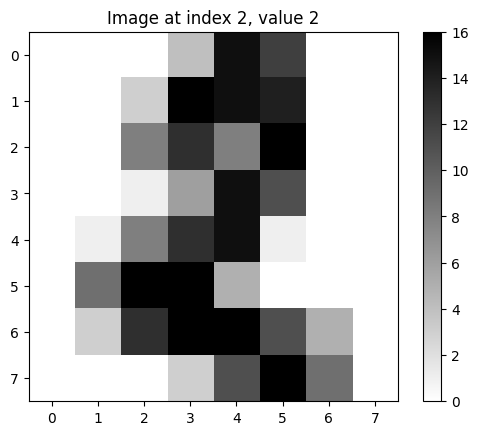

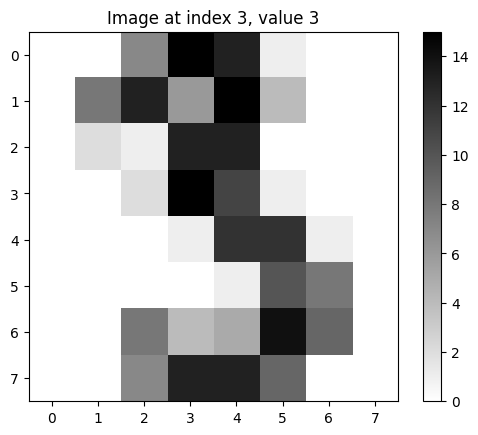

In [77]:
def plotterFunction(i, color):
    plt.imshow(DS.images[i], cmap=color, interpolation='none')
    plt.title(f"Image at index {i}, value {DS.target[i]}")
    plt.colorbar()
    plt.show()

for(i) in range(4):
    plotterFunction(i, 'gray_r')


3) Split the dataset in train and test

In [81]:
X_train, X_test, y_train, y_test = train_test_split(DS.data, DS.target, test_size=0.3, random_state=42)

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((1257, 64), (540, 64)), ((1257,), (540,)))

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

svc = SVC(kernel='linear', random_state=42)

X_train_all = scaler.fit_transform(X_train)
X_test_all = scaler.transform(X_test)
svc.fit(X_train_all, y_train)
y_pred_all = svc.predict(X_test_all)

X_train_1col = scaler.fit_transform(X_train[:, ::8])
X_test_1col = scaler.transform(X_test[:, ::8])
svc.fit(X_train_1col, y_train)


X_train_4col = scaler.fit_transform(X_train[:, 3::8])
X_test_4col = scaler.transform(X_test[:, 3::8])
svc.fit(X_train_4col, y_train)

X_train_8col = scaler.fit_transform(X_train[:, 7::8])
X_test_8col = scaler.transform(X_test[:, 7::8])
svc.fit(X_train_8col, y_train)





SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [88]:
#Svc prediction for all done before for number of features
y_pred_1col = svc.predict(X_test_1col)
y_pred_4col = svc.predict(X_test_4col)
y_pred_8col = svc.predict(X_test_8col)


6) Compute performance metrics

In [89]:
accuracy_all = accuracy_score(y_test, y_pred_all)
accuracy_1col = accuracy_score(y_test, y_pred_1col)
accuracy_4col = accuracy_score(y_test, y_pred_4col)
accuracy_8col = accuracy_score(y_test, y_pred_8col)

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

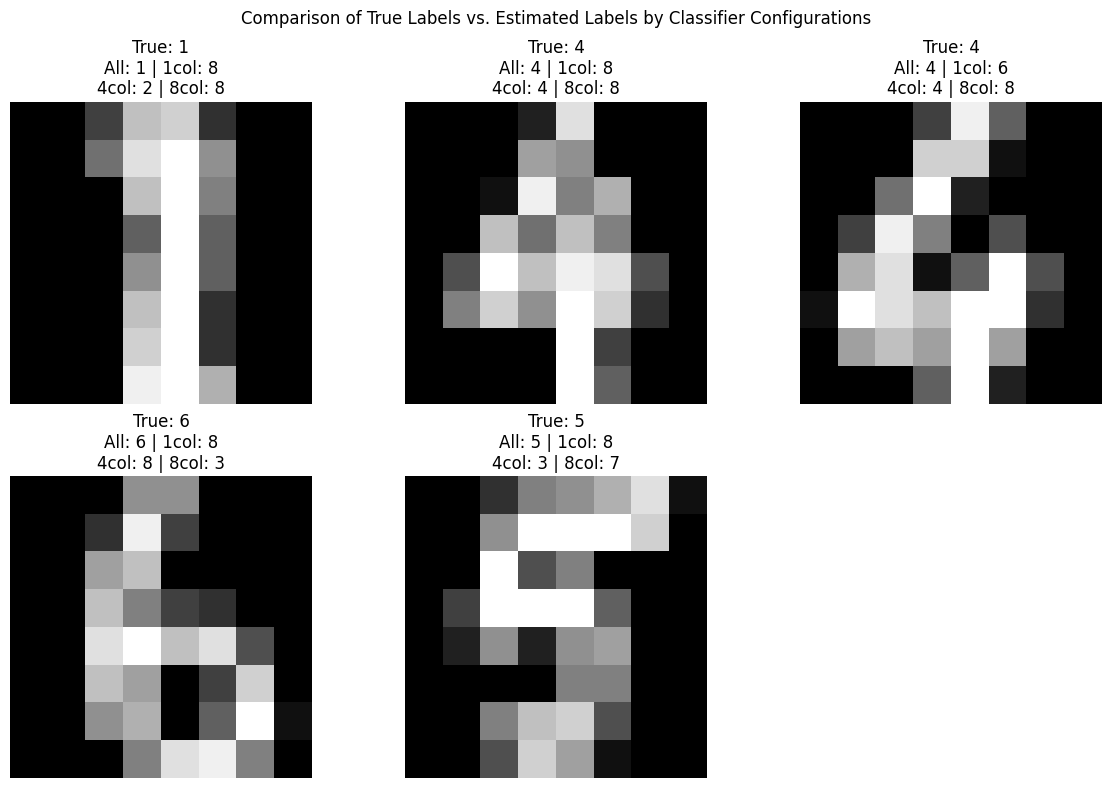

In [91]:
plt.figure(figsize=(12, 8))
sample_indices = [10, 20, 30, 40, 50]

for idx, sample_idx in enumerate(sample_indices):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(X_test[sample_idx].reshape(8, 8), cmap='gray')
    plt.title(
        f"True: {y_test[sample_idx]}\n"
        f"All: {y_pred_all[sample_idx]} | "
        f"1col: {y_pred_1col[sample_idx]}\n"
        f"4col: {y_pred_4col[sample_idx]} | "
        f"8col: {y_pred_8col[sample_idx]}"
    )
    plt.axis('off')

plt.suptitle("Comparison of True Labels vs. Estimated Labels by Classifier Configurations")
plt.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):
In this case, different than before, using a classifier all clearly provided with better results, by actually scoring all of the predictions properly since it has more data available with all the 64px instead of less. while limiting the features to single columns generally leads to misclassifications. The fourth column offers moderate accuracy, showing more reliable predictions than the other single column configurations.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Gracias a esta semana Tec fui capaz de aumentar mi entendimiento de como podemos reproducir ciertos fenomenos y la forma en que una serie de variables afectan para predecir como puede comportarse en un futuro con base a las variables. Entendi lo que son los clusters, sus centroides y la seleccion de numeros de clusters para buscar llegar a soluciones sencillas que minimicen el costo computacional mientras que siguen dandonos un buen nivel de confianza. Gracias a esto podemos reproducir los fenomenos y se entienden los detalles de la importancia de elegir un cierto tamanio de data para entrenar y otra para probar a la vez de la randomizacion controlada que nos permita la reproducibilidad.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
Gracias al uso de las herramientas computacionales fuimos capaces de construir modelos bivariados que puedan replicar el comportamiento de un fenomeno. La forma en la que hemos logrado esto es:

Para construir modelos bivariados usando pandas, organizamos los datos y selecciono las dos variables clave que quiero analizar.

Luego, si busco agrupar los datos según ciertas características, aplico KMeans . Esto me permite clasificar los datos en grupos o clusters según su similitud en las dos variables seleccionadas. Con el elbow plot puedo encontrar el K ideal

Si quiero hacer un modelo predictivo para clasificar nuevos datos, utilizo un classifier. Primero entreno el modelo con datos etiquetados, y luego lo pruebo para ver su precisión usando la métrica de exactitud o accuracy.

Al final, evalúo el modelo y ajusto parámetros o pruebo diferentes classifiers si es necesario, para asegurarme de que el modelo sea lo más preciso posible en la predicción del comportamiento del fenómeno.

SyntaxError: invalid syntax (<ipython-input-92-126d196f9532>, line 1)